# Demand Forecasting of Passenger (HKIA)

## Useful Library

In [1]:
#General Use
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import matplotlib.dates as mdates
import matplotlib.pylab as pylab
import numpy as np

#SARIMA model
from statsmodels.tsa.statespace.sarimax import SARIMAX
from statsmodels.tsa.stattools import acf,pacf

## Import CSV File 

In [2]:
passenger = pd.read_csv('Book.csv',index_col=0, parse_dates=True)

## Time Series Graph (HKIA)

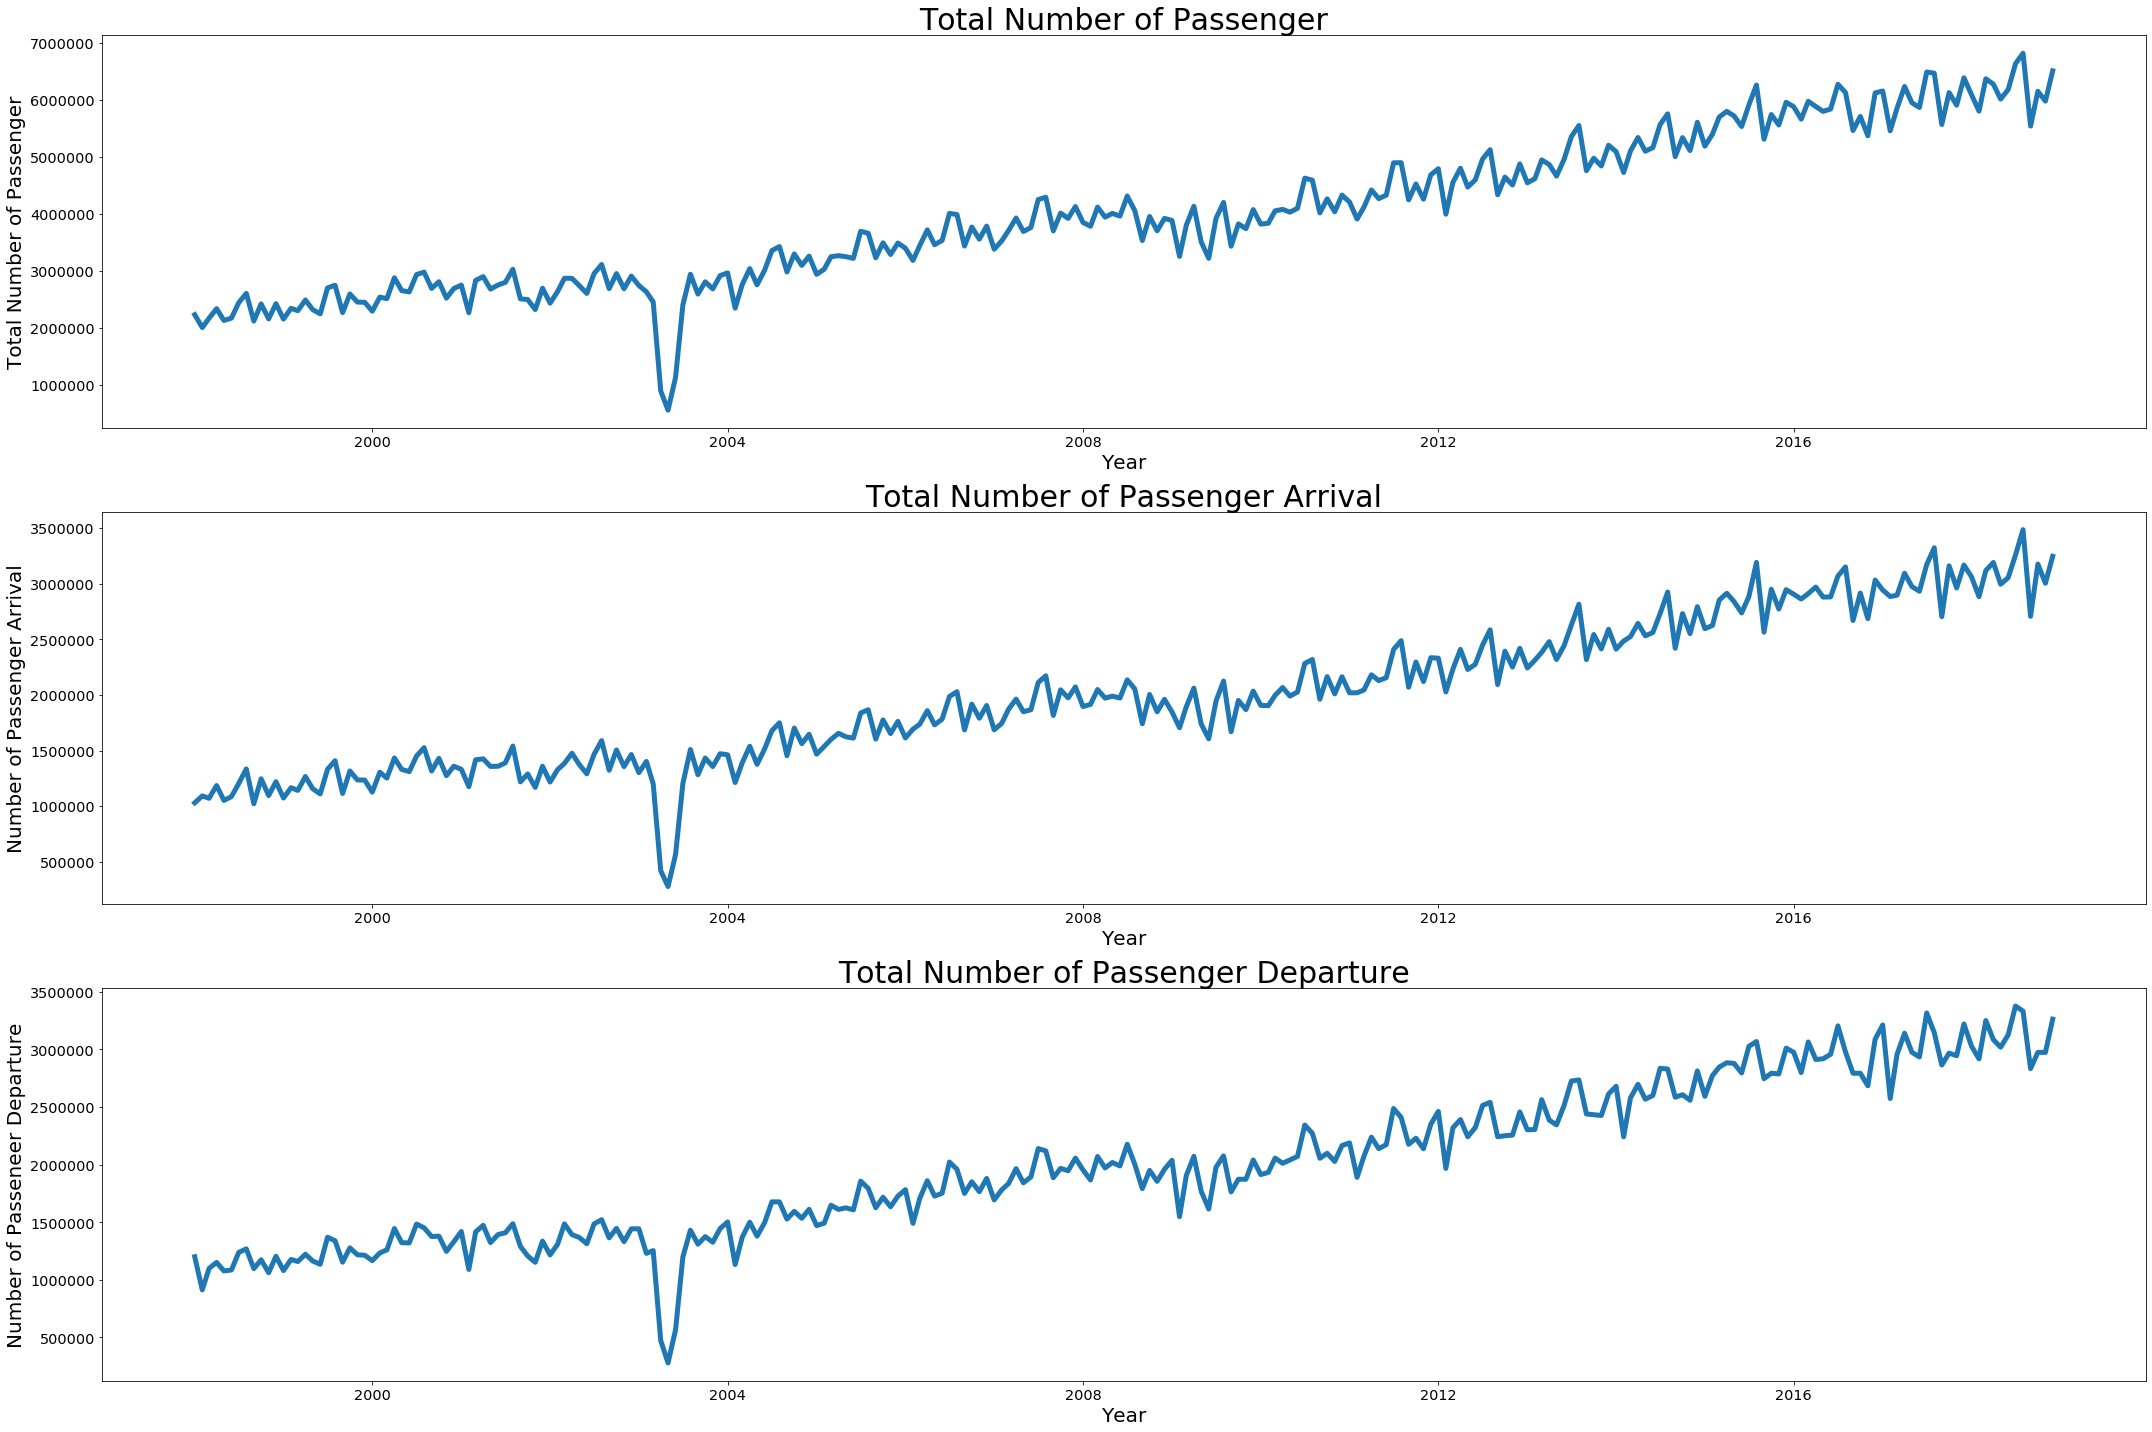

In [3]:
params = {'legend.fontsize': 'x-large','figure.figsize': (30, 20),'axes.labelsize': 'x-large',
          'axes.titlesize':'x-large','xtick.labelsize':'x-large','ytick.labelsize':'x-large'}
pylab.rcParams.update(params)
yaxis_label = ['Total Number of Passenger','Number of Passenger Arrival','Number of Passeneer Departure']
title_label = ['Total Number of Passenger','Total Number of Passenger Arrival','Total Number of Passenger Departure']
fig, ax = plt.subplots(3)
ax[0].plot(passenger.loc['1998-01-01':'2018-12-01', 'Total'],linewidth=5)
ax[1].plot(passenger.loc['1998-01-01':'2018-12-01', 'Arrival'],linewidth=5)
ax[2].plot(passenger.loc['1998-01-01':'2018-12-01', 'Departure'],linewidth=5)
for i in range(3):
    ax[i].set_ylabel(yaxis_label[i], fontsize=20)
    ax[i].set_xlabel('Year', fontsize=20)
    ax[i].set_title(title_label[i], fontsize=30)
fig.tight_layout()
plt.savefig('trend.png', dpi=600)

## Seasonal Passenger Flow (HKIA) 

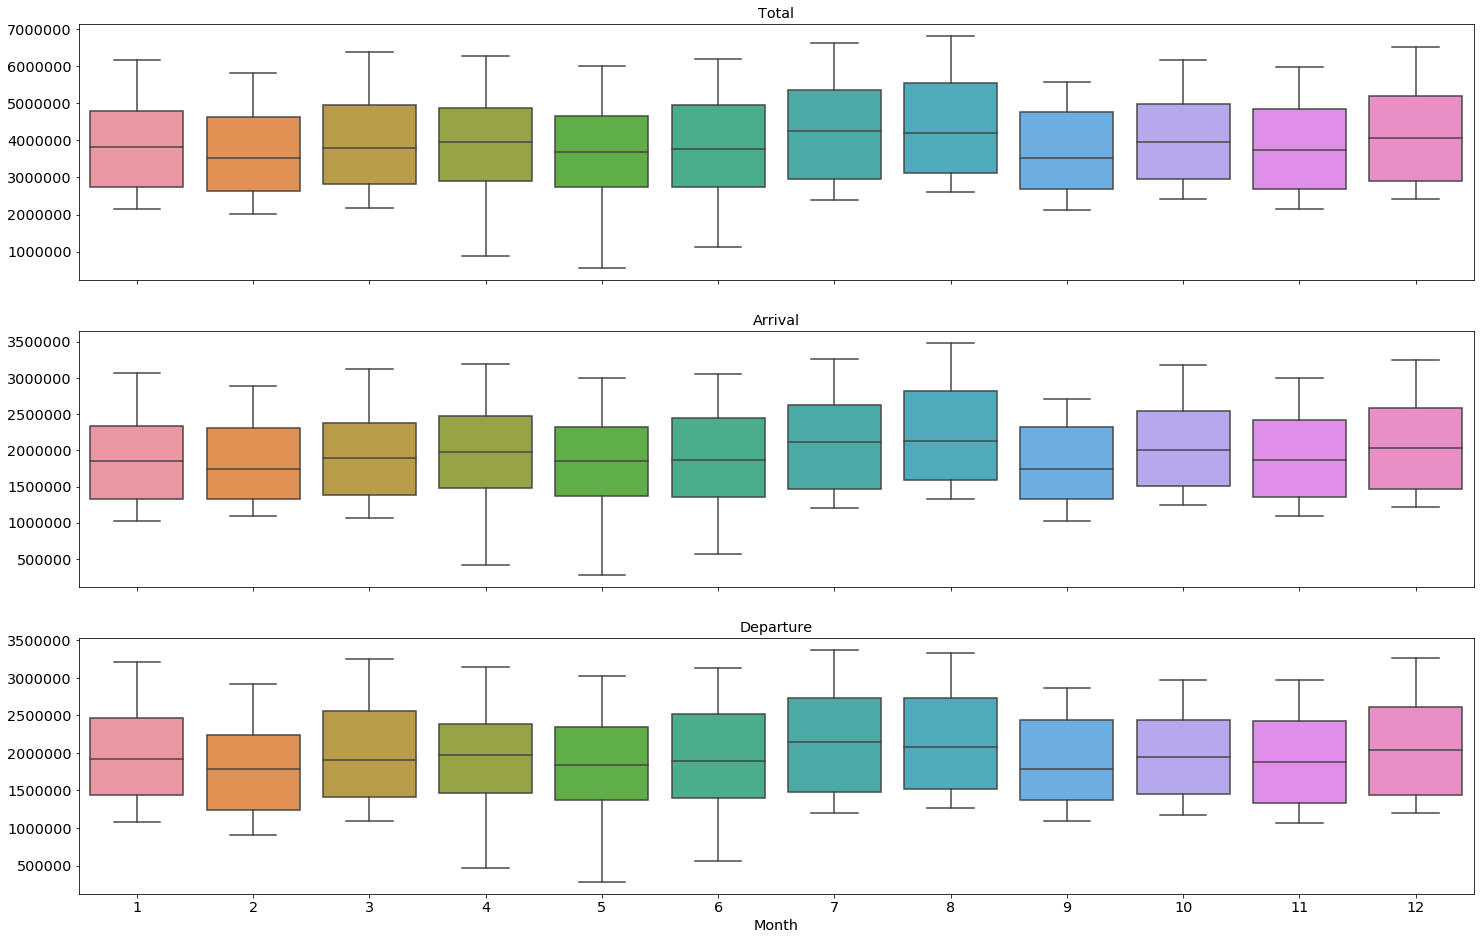

In [4]:
summary = [None] * 12
passenger_modified = passenger.reset_index()
passenger_modified['Month'] = pd.DatetimeIndex(passenger_modified['FullDate']).month

fig, axes = plt.subplots(3, 1, figsize=(25, 16), sharex=True)
for name, ax in zip(['Total', 'Arrival', 'Departure'], axes):
    sns.boxplot(data = passenger_modified, x='Month', y=name, ax=ax)
    ax.set_ylabel("")
    ax.set_title(name)
    if ax != axes[-1]:
        ax.set_xlabel('')
plt.savefig('seasonality.png', dpi=600)

## Seasonal ARIMA
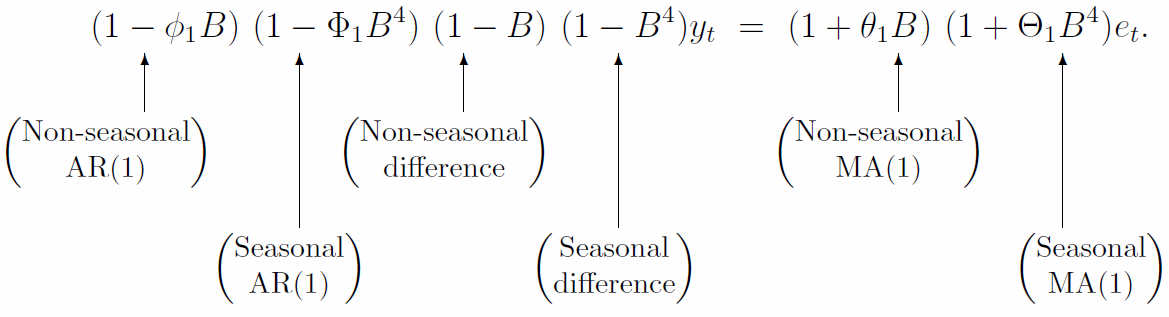
SARIMA(1,1,1)(1,1,1)[4] <br>

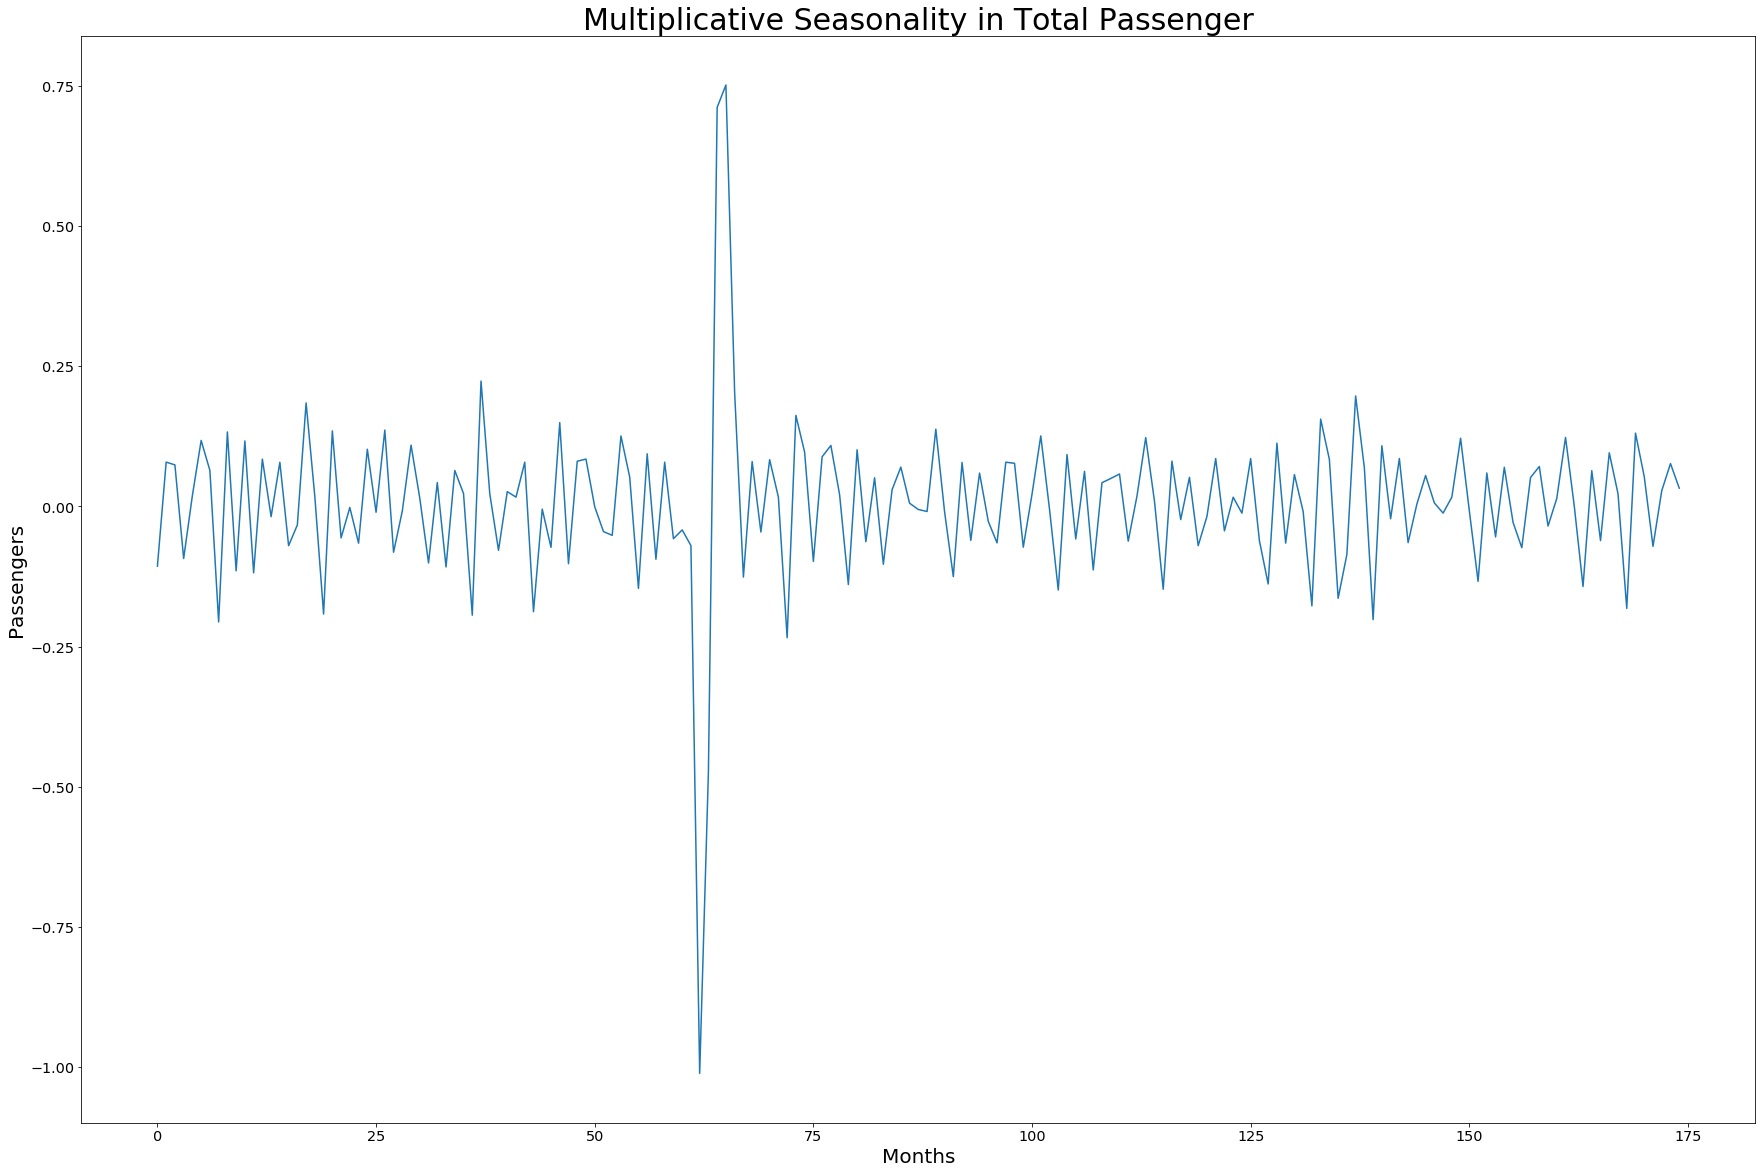

In [5]:
params = {'legend.fontsize': 'x-large','figure.figsize': (30, 20),'axes.labelsize': 'x-large',
          'axes.titlesize':'x-large','xtick.labelsize':'x-large','ytick.labelsize':'x-large'}
pylab.rcParams.update(params)

percent_training = 0.7
series = passenger['Total']
split_point = round(len(series) * percent_training)
training, testing = series[0:split_point] ,series[split_point:]


training = np.log(training)
training_diff = training.diff().values[1:]

plt.plot(training_diff)
plt.title("Multiplicative Seasonality in Total Passenger", fontsize=30)
plt.xlabel("Months", fontsize=20)
plt.ylabel("Passengers", fontsize=20)
plt.savefig('multiplicative_seasonality.png', dpi=600)

## ACF and PACF 

/opt/anaconda3/lib/python3.7/site-packages/statsmodels/tsa/stattools.py:572: FutureWarning: fft=True will become the default in a future version of statsmodels. To suppress this warning, explicitly set fft=False.
  FutureWarning
/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:6: UserWarning: In Matplotlib 3.3 individual lines on a stem plot will be added as a LineCollection instead of individual lines. This significantly improves the performance of a stem plot. To remove this warning and switch to the new behaviour, set the "use_line_collection" keyword argument to True.
  
/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:12: UserWarning: In Matplotlib 3.3 individual lines on a stem plot will be added as a LineCollection instead of individual lines. This significantly improves the performance of a stem plot. To remove this warning and switch to the new behaviour, set the "use_line_collection" keyword argument to True.
  if sys.path[0] == '':


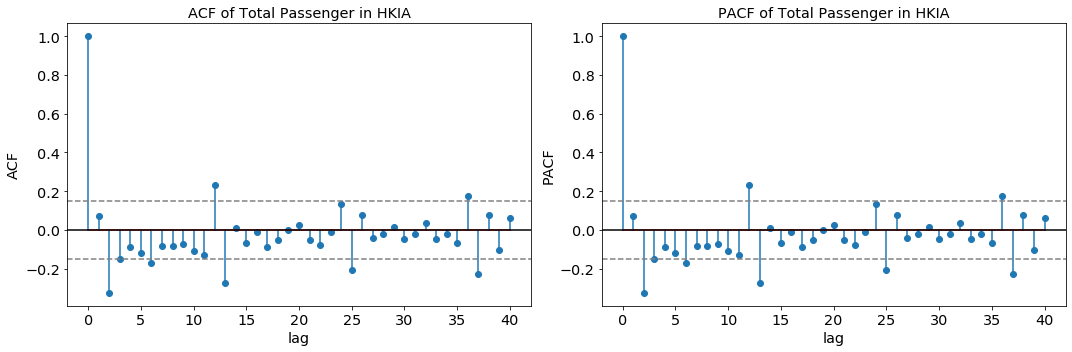

In [6]:
lag_acf = acf(training_diff,nlags=40)
lag_pacf = pacf(training_diff,nlags=40,method='ols')

plt.figure(figsize = (15,5))
plt.subplot(121)
plt.stem(lag_pacf)
plt.axhline(y=0,linestyle='-',color='black')
plt.axhline(y=-1.96/np.sqrt(len(training)),linestyle='--',color='gray')
plt.axhline(y=1.96/np.sqrt(len(training)),linestyle='--',color='gray')
plt.title('ACF of Total Passenger in HKIA'); plt.xlabel('lag'); plt.ylabel('ACF')
plt.subplot(122)
plt.stem(lag_pacf)
plt.axhline(y=0,linestyle='-',color='black')
plt.axhline(y=-1.96/np.sqrt(len(training)),linestyle='--',color='gray')
plt.axhline(y=1.96/np.sqrt(len(training)),linestyle='--',color='gray')
plt.title('PACF of Total Passenger in HKIA'); plt.xlabel('lag'); plt.ylabel('PACF')
plt.tight_layout()
plt.savefig('acf_pacf.png', dpi=600)

## Demand Forecast of Passenger Using SARIMA Model (SARIMA(2,1,2)(1,1,0)[12])

/opt/anaconda3/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_model.py:162: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
/opt/anaconda3/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_model.py:162: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)


                                      SARIMAX Results                                      
Dep. Variable:                               Total   No. Observations:                  176
Model:             SARIMAX(2, 1, 2)x(1, 1, [], 12)   Log Likelihood                  84.001
Date:                             Wed, 09 Dec 2020   AIC                           -156.002
Time:                                     16:39:38   BIC                           -137.978
Sample:                                 01-01-1998   HQIC                          -148.679
                                      - 08-01-2012                                         
Covariance Type:                               opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.7596      0.196      3.878      0.000       0.376       1.143
ar.L2         -0.1748      

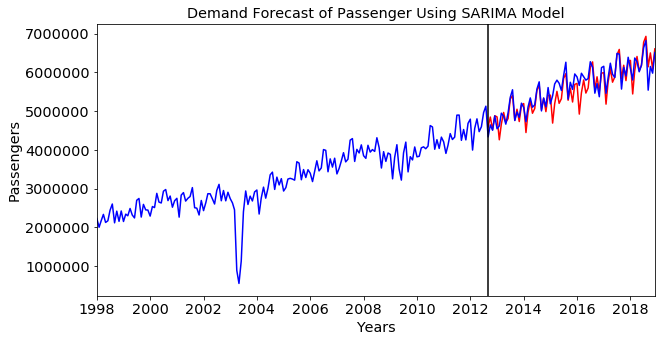

In [7]:
model = SARIMAX(training,order=(2,1,2),seasonal_order=(1,1,0,12),
                enforce_stationarity=False,enforce_invertibility=False)
model_fit = model.fit(disp=False)
print(model_fit.summary())
forecast = np.exp(model_fit.forecast(len(testing)))


RMSE_212 = np.sqrt(sum((forecast-testing)**2)/len(testing))
plt.figure(figsize=(10,5))
plt.plot(forecast,'r')
plt.plot(series,'b')
plt.title('Demand Forecast of Passenger Using SARIMA Model');
plt.xlabel("Years")
plt.ylabel("Passengers");
plt.autoscale(enable=True,axis='x',tight=True)
plt.axvline(x=series.index[split_point],color='black');
plt.savefig('final.png', dpi=600)

## Demand Forecast of Passenger Using SARIMA Model (SARIMA(2,0,2)(1,0,0)[12])

/opt/anaconda3/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_model.py:162: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
/opt/anaconda3/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_model.py:162: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)


                                      SARIMAX Results                                      
Dep. Variable:                               Total   No. Observations:                  176
Model:             SARIMAX(2, 0, 2)x(1, 0, [], 12)   Log Likelihood                  75.881
Date:                             Wed, 09 Dec 2020   AIC                           -139.761
Time:                                     16:39:39   BIC                           -121.235
Sample:                                 01-01-1998   HQIC                          -132.239
                                      - 08-01-2012                                         
Covariance Type:                               opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          1.5389      0.064     23.998      0.000       1.413       1.665
ar.L2         -0.5803      

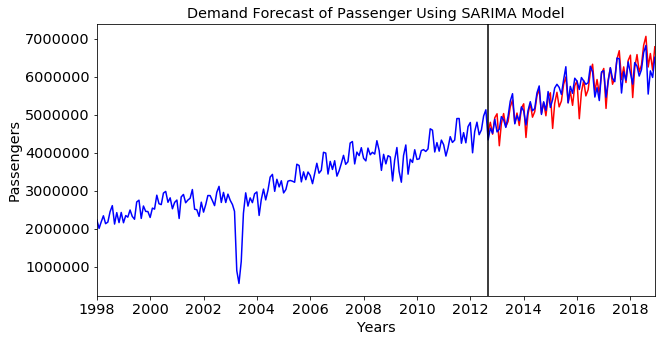

In [8]:
model = SARIMAX(training,order=(2,0,2),seasonal_order=(1,0,0,12),
                enforce_stationarity=False,enforce_invertibility=False)
model_fit = model.fit(disp=False)
print(model_fit.summary())
forecast = np.exp(model_fit.forecast(len(testing)))

RMSE_202 = np.sqrt(sum((forecast-testing)**2)/len(testing))




plt.figure(figsize=(10,5))
plt.plot(forecast,'r')
plt.plot(series,'b')
plt.title('Demand Forecast of Passenger Using SARIMA Model');
plt.xlabel("Years")
plt.ylabel("Passengers");
plt.autoscale(enable=True,axis='x',tight=True)
plt.axvline(x=series.index[split_point],color='black');
plt.savefig('final.png', dpi=600)

## Evaluation (SARIMA(2,1,2)(1,1,0)[12])

Percetage Error:
Maximum of Error Percentage:12.860844812161016%
Minimum of Error Percentage:0.05072016451602446%
Average of Error Percentage:3.5400388504941493%
Maximum of Error:712478.0703573562
Minimum of Error:2692.8486689291894
Average of Error:196669.47269726289
RMSE of SARIMA(2,1,2)(1,1,0)[12]:242113.94088003677
RMSE of SARIMA(2,0,2)(1,0,0)[12]:259672.4305315841


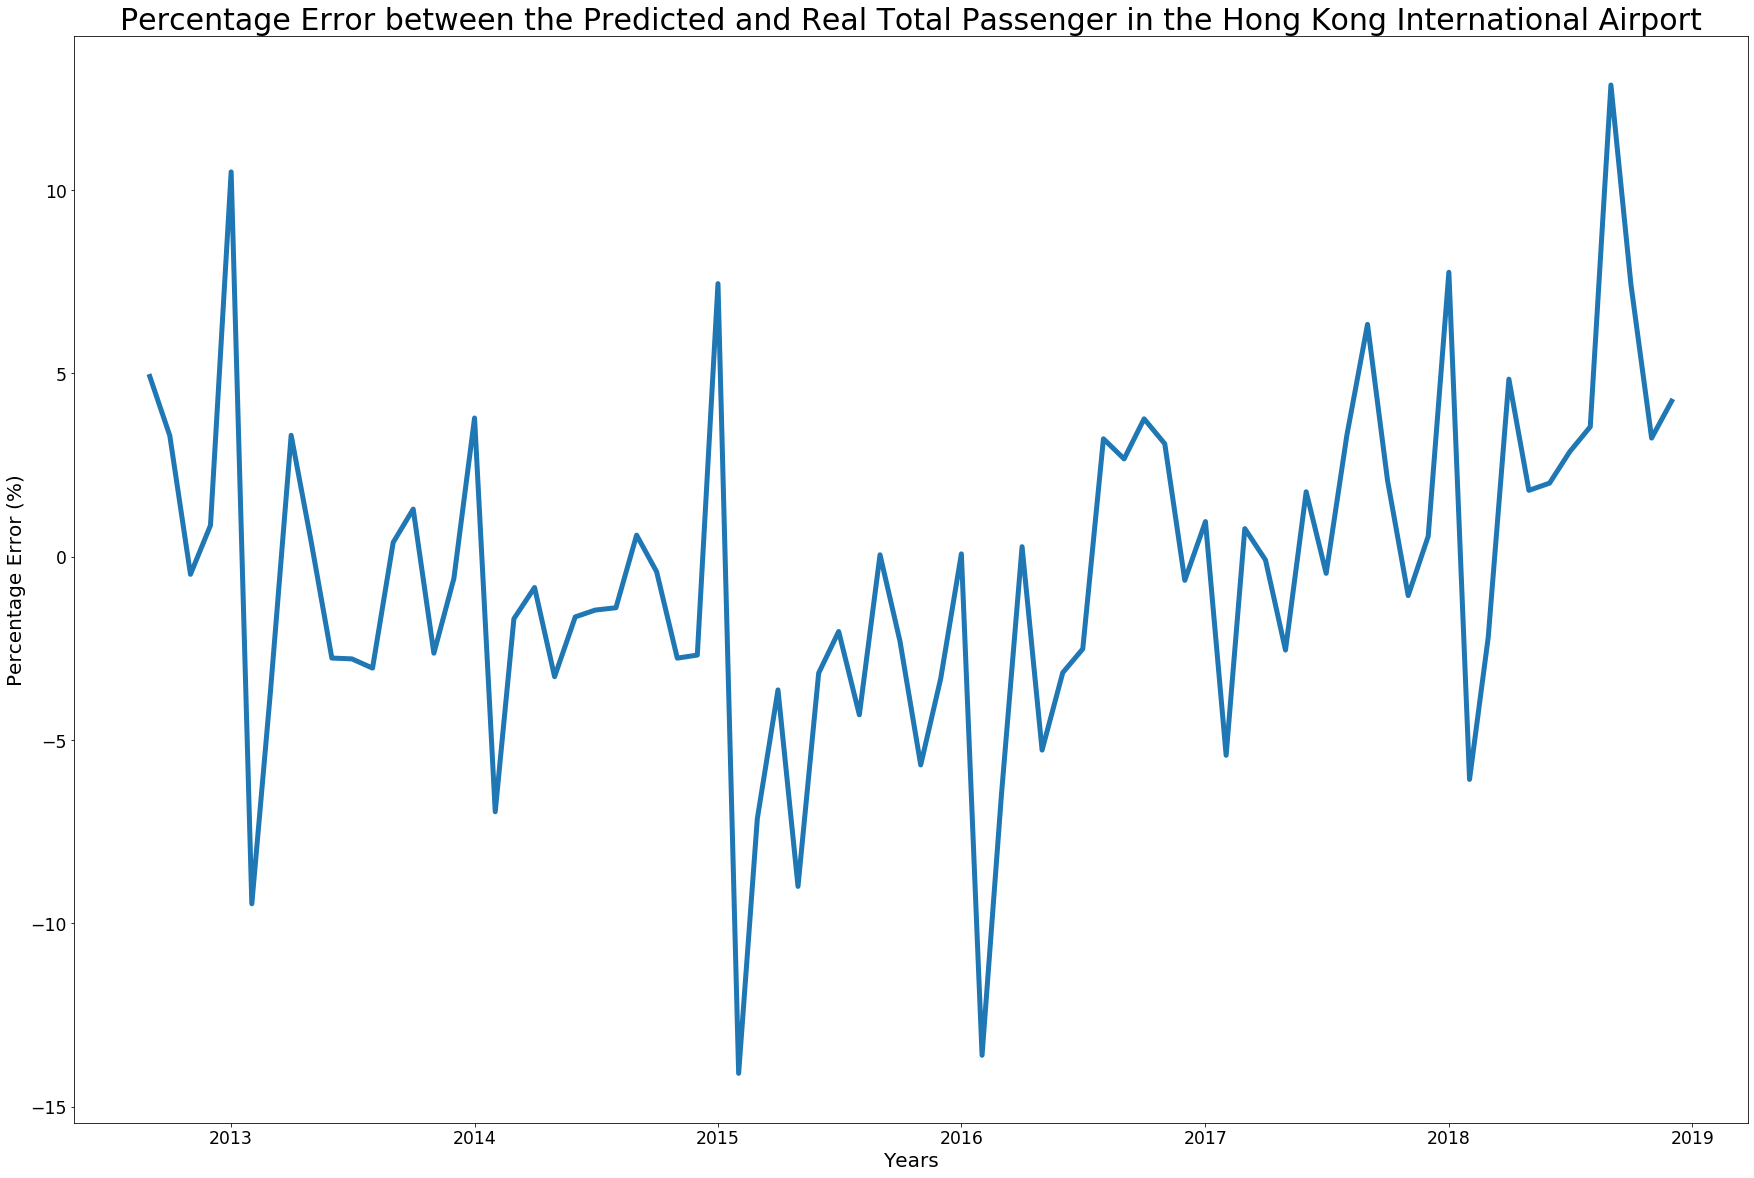

In [9]:
params = {'legend.fontsize': 'xx-large','figure.figsize': (30, 20),'axes.labelsize': 'xx-large',
          'axes.titlesize':'xx-large','xtick.labelsize':'xx-large','ytick.labelsize':'xx-large'}
pylab.rcParams.update(params)

error_abs = abs((forecast - testing)/testing)*100
error = ((forecast - testing)/testing)*100
error_q = forecast - testing
error_q_abs = abs(forecast - testing)
print('Percetage Error:')
print(f'Maximum of Error Percentage:{error.max()}%')
print(f'Minimum of Error Percentage:{error_abs.min()}%')
print(f'Average of Error Percentage:{error_abs.sum()/error_abs.count()}%')
print(f'Maximum of Error:{error_q.max()}')
print(f'Minimum of Error:{error_q_abs.min()}')
print(f'Average of Error:{error_q_abs.sum()/error_q_abs.count()}')
print(f'RMSE of SARIMA(2,1,2)(1,1,0)[12]:{RMSE_212}')
print(f'RMSE of SARIMA(2,0,2)(1,0,0)[12]:{RMSE_202}')

plt.plot(error,linewidth=5)
plt.title("Percentage Error between the Predicted and Real Total Passenger in the Hong Kong International Airport", fontsize=30)
plt.xlabel("Years", fontsize=20)
plt.ylabel("Percentage Error (%)", fontsize=20)
plt.savefig('percentage_error.png', dpi=600)